<a href="https://colab.research.google.com/github/vpaliwal1/MNIST-with-Pytroch/blob/master/Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install torch

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

In [0]:
training_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(dataset= training_data, batch_size=100, shuffle=True)
testing_loader = torch.utils.data.DataLoader(dataset= testing_data, batch_size=100, shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

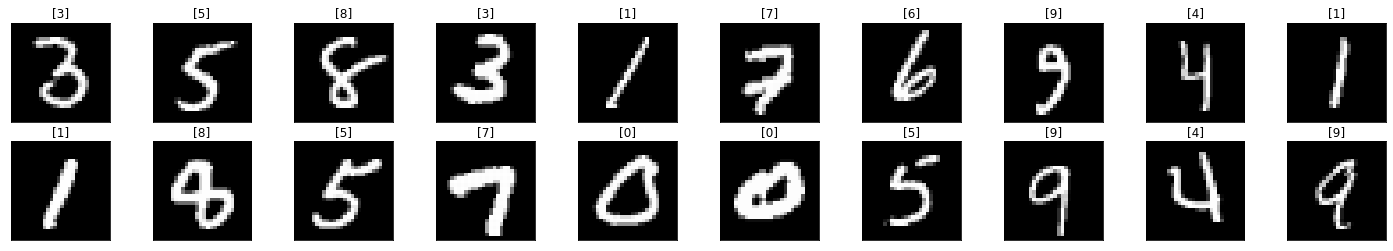

In [0]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))
 
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [0]:
class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1, 20, 5, 1)
      self.conv2 = nn.Conv2d(20, 50, 5, 1)
      self.fc1 = nn.Linear(4*4*50, 500)
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*50)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return x

In [0]:
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [0]:
epochs = 15
running_loss_hist = []
running_corrects_hist = []
test_running_loss_hist = []
test_running_corrects_hist= []

for r in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  test_running_loss = 0.0
  test_running_corrects = 0.0

  for inputs,labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs,1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for test_inputs, test_labels in testing_loader:
        test_inputs = test_inputs.to(device)
        test_labels = test_labels.to(device)
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_labels)

        _, test_preds = torch.max(test_outputs,1)
        test_running_loss += test_loss.item()
        test_running_corrects += torch.sum(test_preds == test_labels.data)

      


    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_hist.append(epoch_loss)
    running_corrects_hist.append(epoch_acc)

    test_epoch_loss = test_running_loss/len(testing_loader)
    test_epoch_acc = test_running_corrects.float()/len(testing_loader)
    test_running_loss_hist.append(test_epoch_loss)
    test_running_corrects_hist.append(test_epoch_acc)
    print('epoch:', (r+1))

    print('training loss: {:.4f}, acc: {:.4f}'.format(epoch_loss, epoch_acc.item())) 
    print('testing loss: {:.4f}, acc: {:.4f}'.format(test_epoch_loss, test_epoch_acc.item())) 

epoch: 1
training loss: 0.5739, acc: 84.5550
testing loss: 0.1743, acc: 94.7700
epoch: 2
training loss: 0.1431, acc: 95.7300
testing loss: 0.0976, acc: 97.0700
epoch: 3
training loss: 0.0941, acc: 97.1850
testing loss: 0.0732, acc: 97.8000
epoch: 4
training loss: 0.0743, acc: 97.7150
testing loss: 0.0565, acc: 98.2800
epoch: 5
training loss: 0.0621, acc: 98.1700
testing loss: 0.0517, acc: 98.3500
epoch: 6
training loss: 0.0522, acc: 98.3783
testing loss: 0.0447, acc: 98.5700
epoch: 7
training loss: 0.0477, acc: 98.5483
testing loss: 0.0417, acc: 98.6700
epoch: 8
training loss: 0.0427, acc: 98.7017
testing loss: 0.0412, acc: 98.7100
epoch: 9
training loss: 0.0386, acc: 98.8267
testing loss: 0.0389, acc: 98.6900
epoch: 10
training loss: 0.0347, acc: 98.8983
testing loss: 0.0363, acc: 98.8800
epoch: 11
training loss: 0.0318, acc: 99.0033
testing loss: 0.0356, acc: 98.8300
epoch: 12
training loss: 0.0292, acc: 99.1283
testing loss: 0.0330, acc: 98.8400
epoch: 13
training loss: 0.0275, acc:

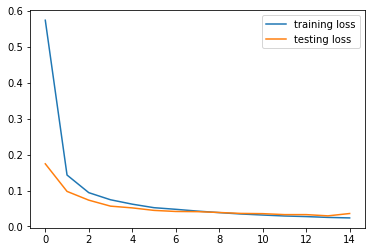

In [0]:
plt.plot(running_loss_hist, label = 'training loss')
plt.plot(test_running_loss_hist, label = 'testing loss')
plt.legend()

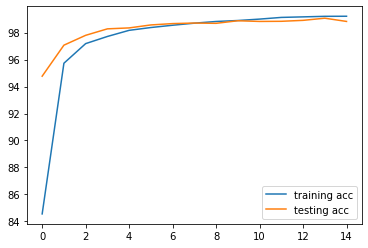

In [0]:
plt.plot(running_corrects_hist, label = 'training acc')
plt.plot(test_running_corrects_hist, label = 'testing acc')
plt.legend()

In [0]:
!pip install pillow==4.0.0

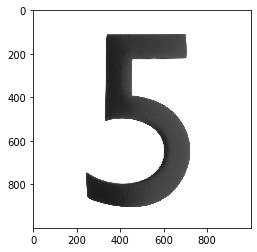

In [0]:
import requests
from PIL import Image
import PIL.ImageOps
import matplotlib.pyplot as plt

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

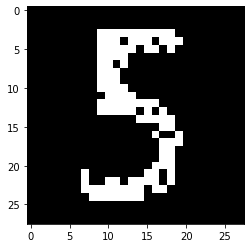

In [0]:
import PIL.ImageOps
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [0]:
images = img.to(device)
image = images[0].unsqueeze(0).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(pred.item())

5


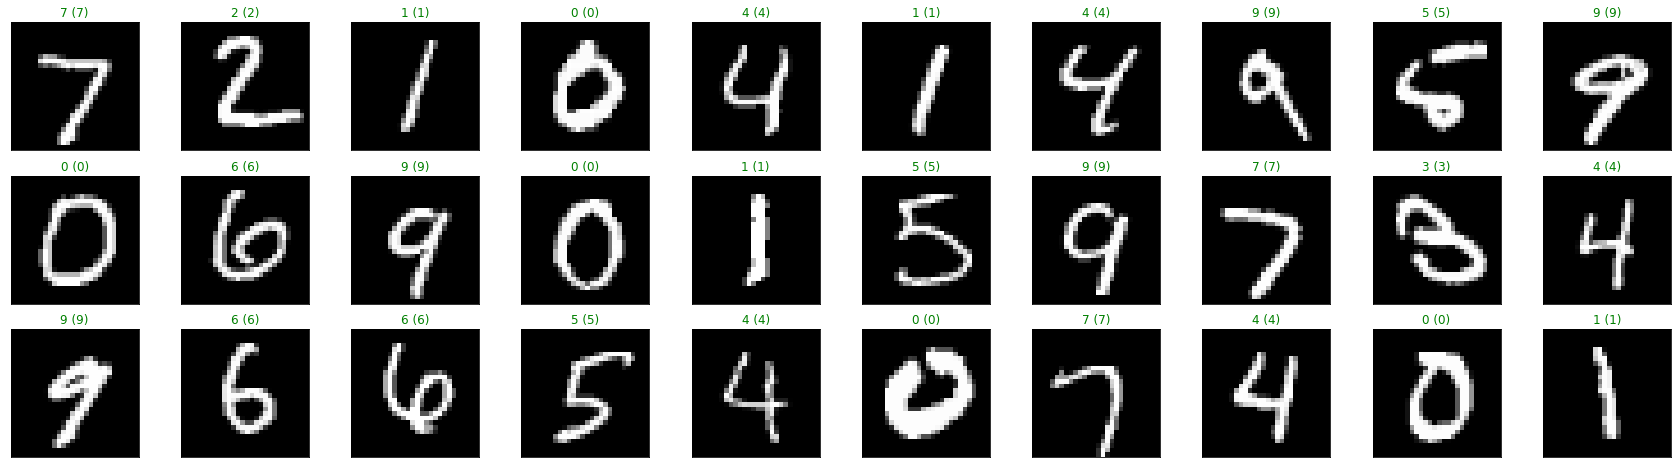

In [0]:
dataiter = iter(testing_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)
 
fig = plt.figure(figsize=(30, 8))
 
for idx in np.arange(30):
  ax = fig.add_subplot(3, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))